In [1]:
import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

__Задание 1.__ Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
bias = 20

X, y, coef = datasets.make_regression(n_samples=10000, n_features=1, n_informative=1, bias=bias,
                                      n_targets=1, noise=40, coef=True, random_state=42)

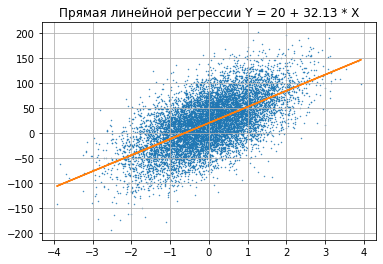

In [3]:
plt.scatter(X, y, s=0.2)
plt.plot(X, bias + coef * X, color='C1')
plt.title(f'Прямая линейной регрессии Y = {bias} + {coef:.2f} * X')
plt.grid()

In [4]:
X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавим единичный столбец к данным

In [5]:
def calc_std_feat(x: np.array): # функция стандартизации данных
    return (x - x.mean()) / x.std()

In [6]:
for i in range(1, X.shape[1]):
    X[:, i] = calc_std_feat(X[:, i])

In [7]:
X.mean(axis=0), X.std(axis=0)

(array([ 1., -0.]), array([0., 1.]))

In [8]:
def calc_mse(y, y_pred): # функция вычисления среднеквадратичной ошибки
    return np.mean(np.square(y - y_pred))

In [9]:
calc_mse(y, bias + coef * X[:, 1])

1608.9080329572653

In [10]:
def gradient_descent(X, y, alpha, iters, tol):
    
    w = np.random.randn(X.shape[1]) # начальные веса
    err_hist, w_hist = [], [w]

    for i in range(int(iters)):
        y_pred = np.dot(X, w)
        
        err = calc_mse(y, y_pred)
        err_hist.append(err)
        
        w = w - 2 * alpha * np.dot(X.T, (y_pred - y)) / X.shape[0]
        w_hist.append(w)

        if i > 2 and np.linalg.norm(w - w_hist[-2], ord=2) < tol:
            break
        
    return w, w_hist, err_hist

In [11]:
def stochastic_gradient_descent(X, y, alpha, iters, tol, n): # n - количество элементов в батче
    
    w = np.random.randn(X.shape[1]) # начальные веса
    err_hist, w_hist = [], [w]

    for i in range(int(iters)):
        y_pred = np.dot(X, w)
        
        err = calc_mse(y, y_pred)
        err_hist.append(err)

        b = np.random.randint(X.shape[0], size=n) # генерируем батч из n элементов

        w = w - 2 * alpha * np.dot(X[b].T, (np.dot(X[b], w) - y[b])) / X.shape[0]

        w_hist.append(w)

        if i > 2 and np.linalg.norm(w - w_hist[-2], ord=2) < tol:
            break
        
    return w, w_hist, err_hist

In [12]:
def plot(w_hist, err_hist, s_w_hist, s_err_hist, xlim):
    
    fig = plt.figure(figsize=(18, 8))
    
    plt.subplot(131)
    plt.title('$MSE$')
    plt.plot(err_hist, linewidth=2, color='C3')
    plt.plot(s_err_hist, linewidth=2, color='C2')
    plt.legend(('Градиентный спуск', 'Стохастический градиентный спуск'), loc='best')
    plt.xlim(xlim[0], xlim[1])
    plt.xlabel('$iterations$')
    plt.ylabel('$MSE$')
    plt.grid()

    plt.subplot(132)
    plt.title('Веса: градиентный спуск')
    plt.plot(w_hist, linewidth=2)
    plt.legend([f'$w_{i}$' for i in range(len(w_hist[0]))], loc='best')
    plt.xlabel('$iterations$')
    plt.ylabel('$w$')
    plt.grid()
    
    plt.subplot(133)
    plt.title('Веса: стохастический градиентный спуск')
    plt.plot(s_w_hist, linewidth=2)
    plt.legend([f'$w_{i}$' for i in range(len(w_hist[0]))], loc='best')
    plt.xlabel('$iterations$')
    plt.ylabel('$w$')
    plt.grid()

In [13]:
def execute(alpha, iters, tol, n, xlim): # xlim - обрезка графика MSE для наглядности
    
    w, w_hist, err_hist = gradient_descent(X, y, alpha=alpha, iters=iters, tol=tol)
    s_w, s_w_hist, s_err_hist = stochastic_gradient_descent(X, y, alpha=alpha, iters=iters, tol=tol, n=n)
    
    print(f'Градиентный спуск: количество итераций = {len(err_hist)}, MSE = {err_hist[-1]:.2f}, \
{[f"w{i} = {w_hist[-1][i]:.2f}" for i in range(len(w_hist[0]))]}')
    
    print(f'Стохастический градиентный спуск: количество итераций = {len(s_err_hist)}, MSE = {s_err_hist[-1]:.2f}, \
{[f"w{i} = {s_w_hist[-1][i]:.2f}" for i in range(len(s_w_hist[0]))]}')
    
    plot(w_hist, err_hist, s_w_hist, s_err_hist, xlim)   

Градиентный спуск: количество итераций = 62, MSE = 1608.32, ['w0 = 20.46', 'w1 = 31.51']
Стохастический градиентный спуск: количество итераций = 10000, MSE = 1608.36, ['w0 = 20.37', 'w1 = 31.70']
Wall time: 9.65 s


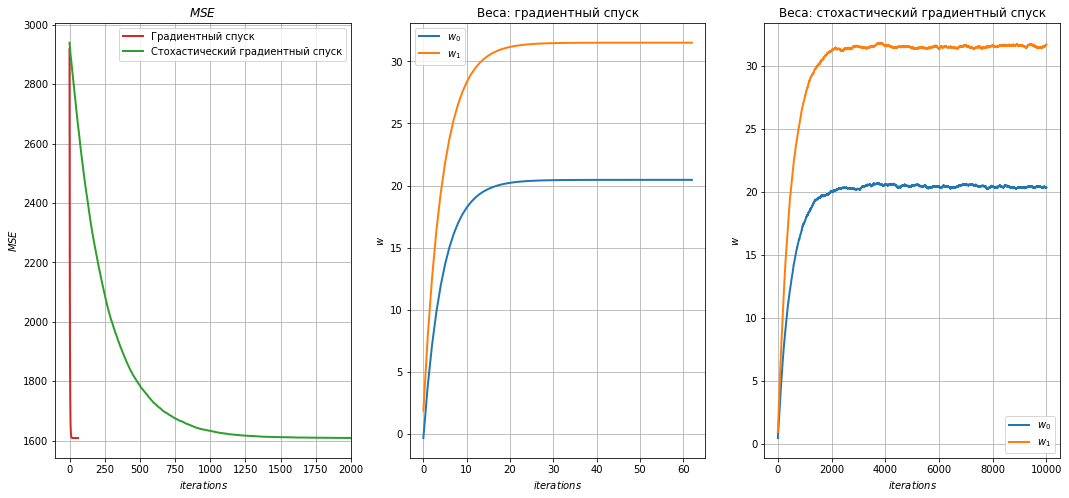

In [14]:
%%time

execute(alpha=0.1, iters=1e4, tol=1e-5, n=100, xlim=[-100, 2000])

Оба метода показали хорошие результаты расчета коэффициентов регрессии, однако метод классического градиентного спуска на данной простой модели работает существенно эффективнее. Ему достаточно около 60 итераций для достижения заданной точности, а к коэффициентам регрессии, близким к заданным, он приближается на 20 итерации, при том, что алгоритм стохастического градиентного спуска, естественно, проходит по всем итерациям до конца, а близких значений коэффициентов регрессии достигает только к 2000 итерации.

Также алгоритм стохастического градиентного спуска сильно зависит от параметров скорости обучения и количества элементов в батче:

Градиентный спуск: количество итераций = 1044, MSE = 1608.32, ['w0 = 20.46', 'w1 = 31.51']
Стохастический градиентный спуск: количество итераций = 10000, MSE = 1796.44, ['w0 = 13.35', 'w1 = 19.78']
Wall time: 11.7 s


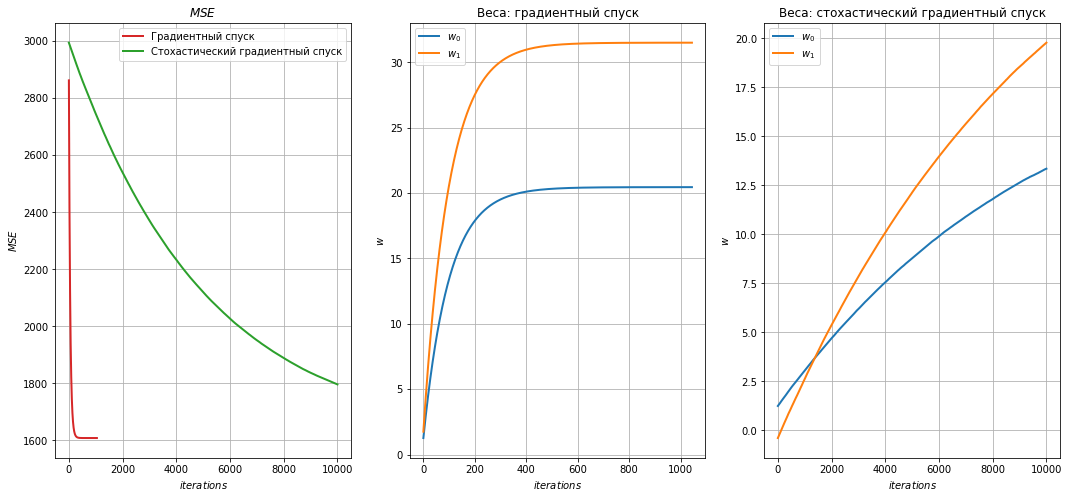

In [15]:
%%time

execute(alpha=0.005, iters=1e4, tol=1e-5, n=100, xlim=[None, None]) # alpha = 0.005

Градиентный спуск: количество итераций = 62, MSE = 1608.32, ['w0 = 20.46', 'w1 = 31.51']
Стохастический градиентный спуск: количество итераций = 10000, MSE = 1632.91, ['w0 = 17.77', 'w1 = 27.34']
Wall time: 8.02 s


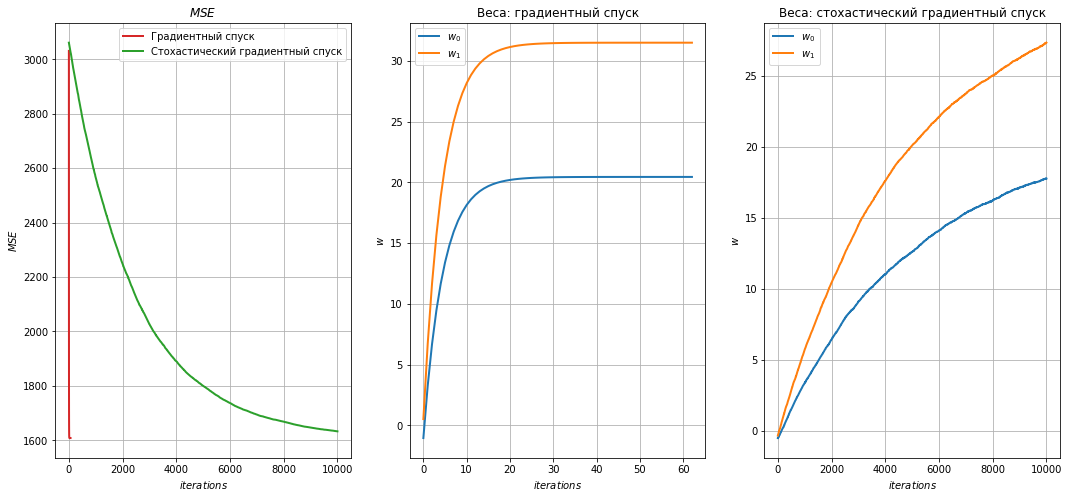

In [16]:
%%time

execute(alpha=0.1, iters=1e4, tol=1e-5, n=10, xlim=[None, None]) # n = 10

__Задание 2.__ Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации и сравнить результаты.

In [17]:
def calc_mse_l2(y, y_pred, lambda_, w): # функция вычисления среднеквадратичной ошибки с L2 регуляризацей
    return np.mean(np.square(y - y_pred)) + lambda_ * np.sum(np.square(w))

In [18]:
def gradient_descent_l2(X, y, alpha, iters, tol, lambda_):
    
    w = np.random.randn(X.shape[1]) # начальные веса
    err_hist, w_hist = [], [w]

    for i in range(int(iters)):
        y_pred = np.dot(X, w)
        
        err = calc_mse_l2(y, y_pred, lambda_, w)
        err_hist.append(err)
        
        w = w - 2 * alpha * np.dot(X.T, (y_pred - y)) / X.shape[0] - 2 * lambda_ * np.sum(w)
        w_hist.append(w)

        if i > 2 and np.linalg.norm(w - w_hist[-2], ord=2) < tol:
            break
        
    return w, w_hist, err_hist

In [19]:
def stochastic_gradient_descent_l2(X, y, alpha, iters, tol, n, lambda_): # n - количество элементов в батче
    
    w = np.random.randn(X.shape[1]) # начальные веса
    err_hist, w_hist = [], [w]

    for i in range(int(iters)):
        y_pred = np.dot(X, w)
        
        err = calc_mse_l2(y, y_pred, lambda_, w)
        err_hist.append(err)

        b = np.random.randint(X.shape[0], size=n) # генерируем батч из n элементов

        w = w - 2 * alpha * np.dot(X[b].T, (np.dot(X[b], w) - y[b])) / X.shape[0] - 2 * lambda_ * np.sum(w)

        w_hist.append(w)

        if i > 2 and np.linalg.norm(w - w_hist[-2], ord=2) < tol:
            break
        
    return w, w_hist, err_hist

In [20]:
def execute_l2(alpha, iters, tol, n, lambda_, xlim): # xlim - обрезка графика MSE для наглядности
    
    w, w_hist, err_hist = gradient_descent_l2(X, y, alpha=alpha, iters=iters, tol=tol, lambda_=lambda_)
    s_w, s_w_hist, s_err_hist = stochastic_gradient_descent_l2(X, y, alpha=alpha, iters=iters, tol=tol, n=n, lambda_=lambda_)
    
    print(f'Градиентный спуск: количество итераций = {len(err_hist)}, MSE = {err_hist[-1]:.2f}, \
{[f"w{i} = {w_hist[-1][i]:.2f}" for i in range(len(w_hist[0]))]}')
    
    print(f'Стохастический градиентный спуск: количество итераций = {len(s_err_hist)}, MSE = {s_err_hist[-1]:.2f}, \
{[f"w{i} = {s_w_hist[-1][i]:.2f}" for i in range(len(s_w_hist[0]))]}')
    
    plot(w_hist, err_hist, s_w_hist, s_err_hist, xlim)   

Градиентный спуск: количество итераций = 62, MSE = 1608.33, ['w0 = 20.45', 'w1 = 31.50']
Стохастический градиентный спуск: количество итераций = 10000, MSE = 1608.82, ['w0 = 19.96', 'w1 = 31.02']
Wall time: 8.32 s


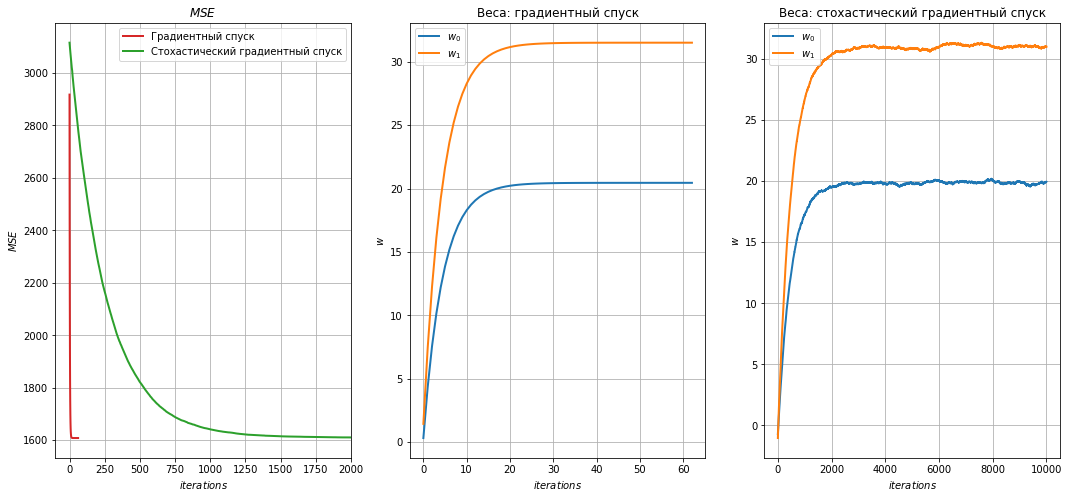

In [21]:
%%time

execute_l2(alpha=0.1, iters=1e4, tol=1e-5, n=100, lambda_=1e-5, xlim=[-100, 2000])

Регуляризация не добавила точности к данной простой модели линейной регрессии. При этом, при увеличении параметра $\lambda$ алгоритм стохастического градиентного спуска начинает показывать некорректные результаты:

Градиентный спуск: количество итераций = 61, MSE = 1610.20, ['w0 = 19.95', 'w1 = 31.00']
Стохастический градиентный спуск: количество итераций = 10000, MSE = 2213.24, ['w0 = 2.99', 'w1 = 14.20']
Wall time: 8.07 s


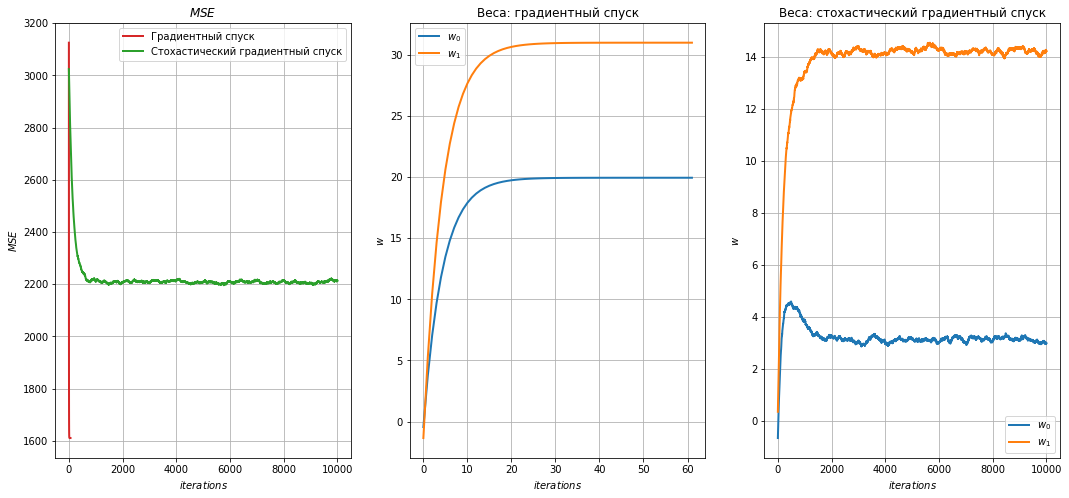

In [22]:
%%time

execute_l2(alpha=0.1, iters=1e4, tol=1e-5, n=100, lambda_=1e-3, xlim=[None, None]) # lambda_=1e-3

__Задание 3 (опция).__ Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [23]:
def calc_mse_l1(y, y_pred, lambda_, w): # функция вычисления среднеквадратичной ошибки с L1 регуляризацей
    return np.mean(np.square(y - y_pred)) + lambda_ * np.sum(np.abs(w))

In [24]:
def gradient_descent_l1(X, y, alpha, iters, tol, lambda_):
    
    w = np.random.randn(X.shape[1]) # начальные веса
    err_hist, w_hist = [], [w]

    for i in range(int(iters)):
        y_pred = np.dot(X, w)
        
        err = calc_mse_l1(y, y_pred, lambda_, w)
        err_hist.append(err)
        
        w = w - 2 * alpha * np.dot(X.T, (y_pred - y)) / X.shape[0] - lambda_ * np.sum(w) / np.sum(np.abs(w))
        w_hist.append(w)

        if i > 2 and np.linalg.norm(w - w_hist[-2], ord=2) < tol:
            break
        
    return w, w_hist, err_hist

In [25]:
def stochastic_gradient_descent_l1(X, y, alpha, iters, tol, n, lambda_): # n - количество элементов в батче
    
    w = np.random.randn(X.shape[1]) # начальные веса
    err_hist, w_hist = [], [w]

    for i in range(int(iters)):
        y_pred = np.dot(X, w)
        
        err = calc_mse_l1(y, y_pred, lambda_, w)
        err_hist.append(err)

        b = np.random.randint(X.shape[0], size=n) # генерируем батч из n элементов

        w = w - 2 * alpha * np.dot(X[b].T, (np.dot(X[b], w) - y[b])) / X.shape[0] - lambda_ * np.sum(w) / np.sum(np.abs(w))

        w_hist.append(w)

        if i > 2 and np.linalg.norm(w - w_hist[-2], ord=2) < tol:
            break
        
    return w, w_hist, err_hist

In [26]:
def execute_l1(alpha, iters, tol, n, lambda_, xlim): # xlim - обрезка графика MSE для наглядности
    
    w, w_hist, err_hist = gradient_descent_l1(X, y, alpha=alpha, iters=iters, tol=tol, lambda_=lambda_)
    s_w, s_w_hist, s_err_hist = stochastic_gradient_descent_l1(X, y, alpha=alpha, iters=iters, tol=tol, n=n, lambda_=lambda_)
    
    print(f'Градиентный спуск: количество итераций = {len(err_hist)}, MSE = {err_hist[-1]:.2f}, \
{[f"w{i} = {w_hist[-1][i]:.2f}" for i in range(len(w_hist[0]))]}')
    
    print(f'Стохастический градиентный спуск: количество итераций = {len(s_err_hist)}, MSE = {s_err_hist[-1]:.2f}, \
{[f"w{i} = {s_w_hist[-1][i]:.2f}" for i in range(len(s_w_hist[0]))]}')
    
    plot(w_hist, err_hist, s_w_hist, s_err_hist, xlim)   

Градиентный спуск: количество итераций = 62, MSE = 1608.32, ['w0 = 20.46', 'w1 = 31.51']
Стохастический градиентный спуск: количество итераций = 10000, MSE = 1608.36, ['w0 = 20.40', 'w1 = 31.32']
Wall time: 8.12 s


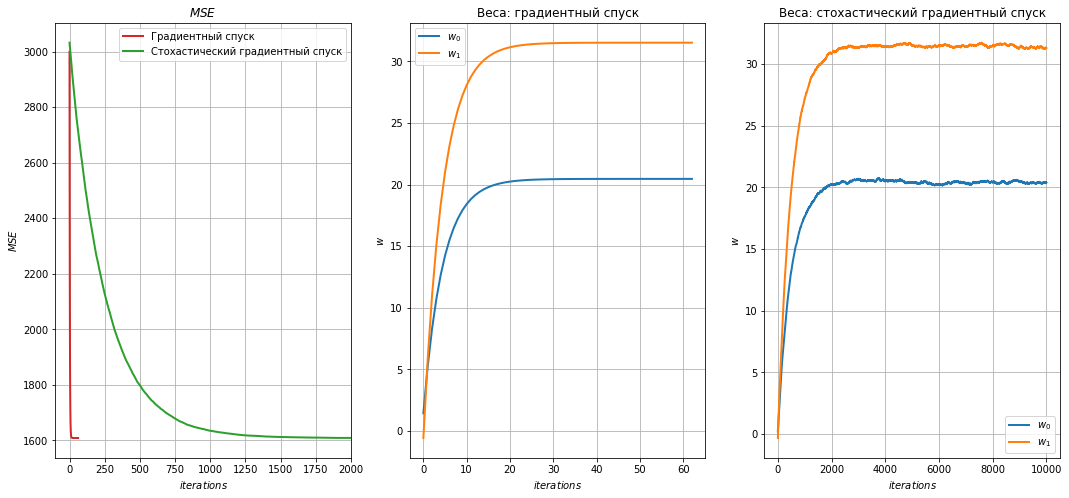

In [27]:
%%time

execute_l1(alpha=0.1, iters=1e4, tol=1e-5, n=100, lambda_=1e-5, xlim=[-100, 2000])

Результаты построения модели с $L_1$-регуляризацией практически не отличаются от модели с $L_2$-регуляризацией.

Как и в случае с $L_2$-регуляризацией, при увеличении параметра $\lambda$ алгоритм стохастического градиентного спуска ведет себя похожим образом, но при значениях $\lambda$ существенно выше:

Градиентный спуск: количество итераций = 62, MSE = 1608.37, ['w0 = 20.45', 'w1 = 31.50']
Стохастический градиентный спуск: количество итераций = 10000, MSE = 1608.75, ['w0 = 20.13', 'w1 = 30.99']
Wall time: 7.99 s


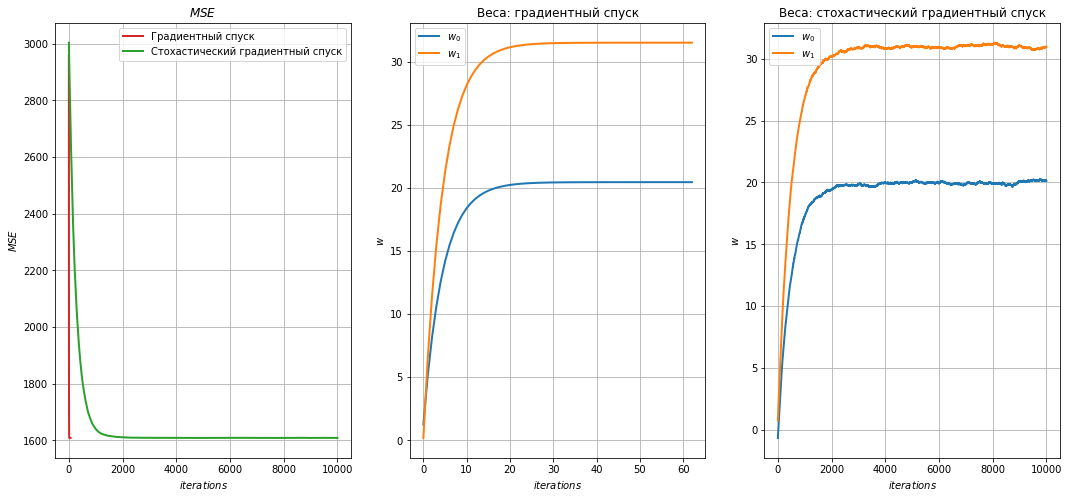

In [28]:
%%time

execute_l1(alpha=0.1, iters=1e4, tol=1e-5, n=100, lambda_=1e-3, xlim=[None, None]) # lambda_=1e-3

Градиентный спуск: количество итераций = 62, MSE = 1613.92, ['w0 = 19.96', 'w1 = 31.01']
Стохастический градиентный спуск: количество итераций = 10000, MSE = 2707.24, ['w0 = -2.95', 'w1 = 8.06']
Wall time: 8.23 s


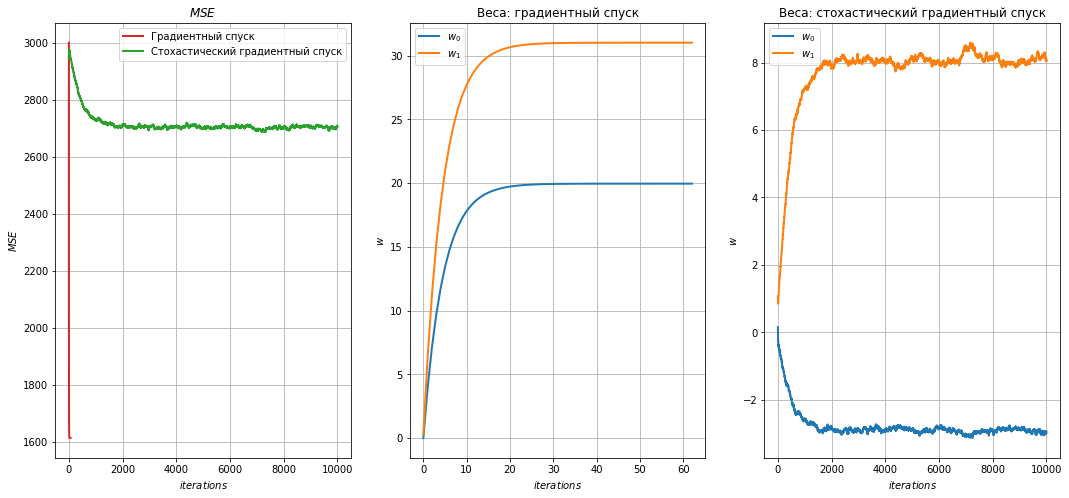

In [29]:
%%time

execute_l1(alpha=0.1, iters=1e4, tol=1e-5, n=100, lambda_=1e-1, xlim=[None, None]) # lambda_=1e-1